### Feature processing

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.subplots as sp
import plotly.graph_objs as go
import random
# !pip install -U scikit-learn
pd.set_option('display.max_columns', None)
random.seed(42)

In [ ]:
df = pd.read_csv('df_withoutOutliers.csv')
df.shape

(6845, 48)

### New Features Derivation

##### Existing features
ack_count:Number of packets with ack flag set in the same flow
syn_count:Number of packets with syn flag set in the same flow
fin_count:Number of packets with fin flag set in the same flow
urg_count:Number of packets with urg flag set in the same flow
rst_count:Number of packets with rst flag set in the same flow
Number: The number of packets in the flow

##### New features
ratio_ack: Ratio of ACK packets to total packets.
ratio_syn: Ratio of SYN packets to total packets.
ratio_fin: Ratio of fin packets to total packets.
ratio_urg: Ratio of urg packets to total packets.
ratio_rst: Ratio of rst packets to total packets.

In [ ]:
df['ratio_ack']=df['ack_count']/df['Number']
df['ratio_syn']=df['syn_count']/df['Number']
df['ratio_fin']=df['fin_count']/df['Number']
df['ratio_urg']=df['urg_count']/df['Number']
df['ratio_rst']=df['rst_count']/df['Number']

The FIN flag indicates the end of data transmission to finish a TCP connection. Their purposes are mutually exclusive. A TCP header with the SYN and FIN flags set is anomalous TCP behavior, causing various responses from the recipient, depending on the OS.

In [ ]:
df[df['syn_flag_number']+df['fin_flag_number']>1.]

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label,family,ratio_ack,ratio_syn,ratio_fin,ratio_urg,ratio_rst


What does the combination of the RST and ACK flags indicate?
In the case of a RST/ACK, The device is acknowledging whatever data was sent in the previous packet(s) in the sequence with an ACK and then notifying the sender that the connection has closed with the RST. The device is simply combining the two packets into one, just like a SYN/ACK.

In [ ]:
df['ifRskAck']=np.zeros(df.shape[0])
df['ifRskAck'][df['rst_flag_number']+df['ack_flag_number']==2.]=1

In [ ]:
df[df['rst_flag_number']+df['ack_flag_number']==2.]

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label,family,ratio_ack,ratio_syn,ratio_fin,ratio_urg,ratio_rst,ifRskAck
2777,12.703188,366.82,6,64.0,0.457815,0.457815,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.87,2.86,0.00,2.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.299936e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-HTTP_Flood,DoS,0.0,0.302105,0.301053,0.000000,0.301053,1.0
2820,22.441823,453.58,6,64.0,1.091559,1.091559,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.67,3.25,0.04,3.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,676.98,62.64,75.88,65.432124,4.065530,63.42,8.300283e+07,9.5,11.403792,5.754639,88.811717,0.19,141.55,DoS-HTTP_Flood,DoS,0.0,0.386316,0.342105,0.004211,0.347368,1.0
2924,20.940220,471.36,6,64.0,0.350815,0.350815,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.75,3.59,0.00,3.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,607.00,57.20,58.00,57.894434,0.262841,57.20,8.300283e+07,9.5,10.738889,0.361713,1.680227,0.04,141.55,DoS-HTTP_Flood,DoS,0.0,0.394737,0.377895,0.000000,0.377895,1.0
4235,0.040604,112.00,6,64.0,49.256575,49.256575,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.00,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,297.00,54.00,54.00,54.000000,0.000000,54.00,2.489090e-05,5.5,10.392305,0.000000,0.000000,0.00,38.50,Recon-PortScan,Recon,0.0,0.181818,0.181818,0.000000,0.181818,1.0
4241,0.046825,112.00,6,64.0,42.712846,42.712846,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.00,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,837.00,54.00,54.00,54.000000,0.000000,54.00,1.664211e+08,13.5,10.392305,0.000000,0.000000,0.00,244.60,Recon-PortScan,Recon,0.0,0.074074,0.074074,0.000000,0.074074,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,0.012027,59.80,6,120.1,15.984352,15.984352,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.10,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,297.80,54.00,54.80,54.084444,0.245708,54.40,2.485514e-03,5.5,10.400415,0.347483,0.302025,0.20,38.50,Recon-HostDiscovery,Recon,0.0,0.018182,0.181818,0.000000,0.181818,1.0
5003,0.018617,71.80,6,115.2,31.417529,31.417529,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.40,0.90,0.00,0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,306.60,54.40,58.00,55.988095,1.760640,55.60,9.773016e-04,5.5,10.581649,2.489921,3.445948,0.90,38.50,Recon-HostDiscovery,Recon,0.0,0.072727,0.163636,0.000000,0.163636,1.0
5006,0.058060,101.20,6,60.6,29.447402,29.447402,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.00,0.80,0.00,0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,884.60,54.80,58.00,57.173739,1.339493,54.80,1.664287e+08,13.5,10.694399,1.890075,2.297862,0.80,244.60,Recon-PortScan,Recon,0.0,0.074074,0.059259,0.000000,0.059259,1.0
5007,0.012404,66.00,6,155.6,33.052252,33.052252,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.30,0.90,0.00,0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,872.20,54.00,58.00,56.289877,1.971931,55.20,1.668466e+08,13.5,10.611344,2.788339,3.887996,1.00,244.60,Recon-HostDiscovery,Recon,0.0,0.022222,0.066667,0.000000,0.066667,1.0


In [ ]:
df['ifBiggerPacketSize']=np.zeros(df.shape[0])
df['ifBiggerPacketSize'][df['Tot size']>df['AVG']]=1

In [ ]:
df['ratioPacketSizeToTotal']=df['Tot size']/df['Tot sum']
df['ratioTotalSizeToTotalNumber']=df['Tot sum']/df['Number']
df['ratioTotalSizeToDuration']=df['Tot sum'].divide(df['flow_duration']+0.00001)

### Removing features w/ unique values

In [ ]:
#checking columns with unique values
cols  = []
for col in df.columns:
    x = len(set(df[col]))
    if x == 1:
        cols.append(col)
print(f'Columns with unique values: {cols}')
df = df.drop(cols, axis=1)


Columns with unique values: ['ece_flag_number', 'cwr_flag_number', 'Telnet', 'SMTP', 'IRC', 'DHCP']


### Highly Correlated features
https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features

In [ ]:
df_noTarget = df.select_dtypes(include=[np.number])
binary_columns = ['DNS', 'Telnet', 'SMTP', 'HTTP', 'HTTPS', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']
numeric_df = df_noTarget.drop(columns=binary_columns, errors='ignore')  # errors='ignore' allows for columns that don't exist to be skipped without raising an error


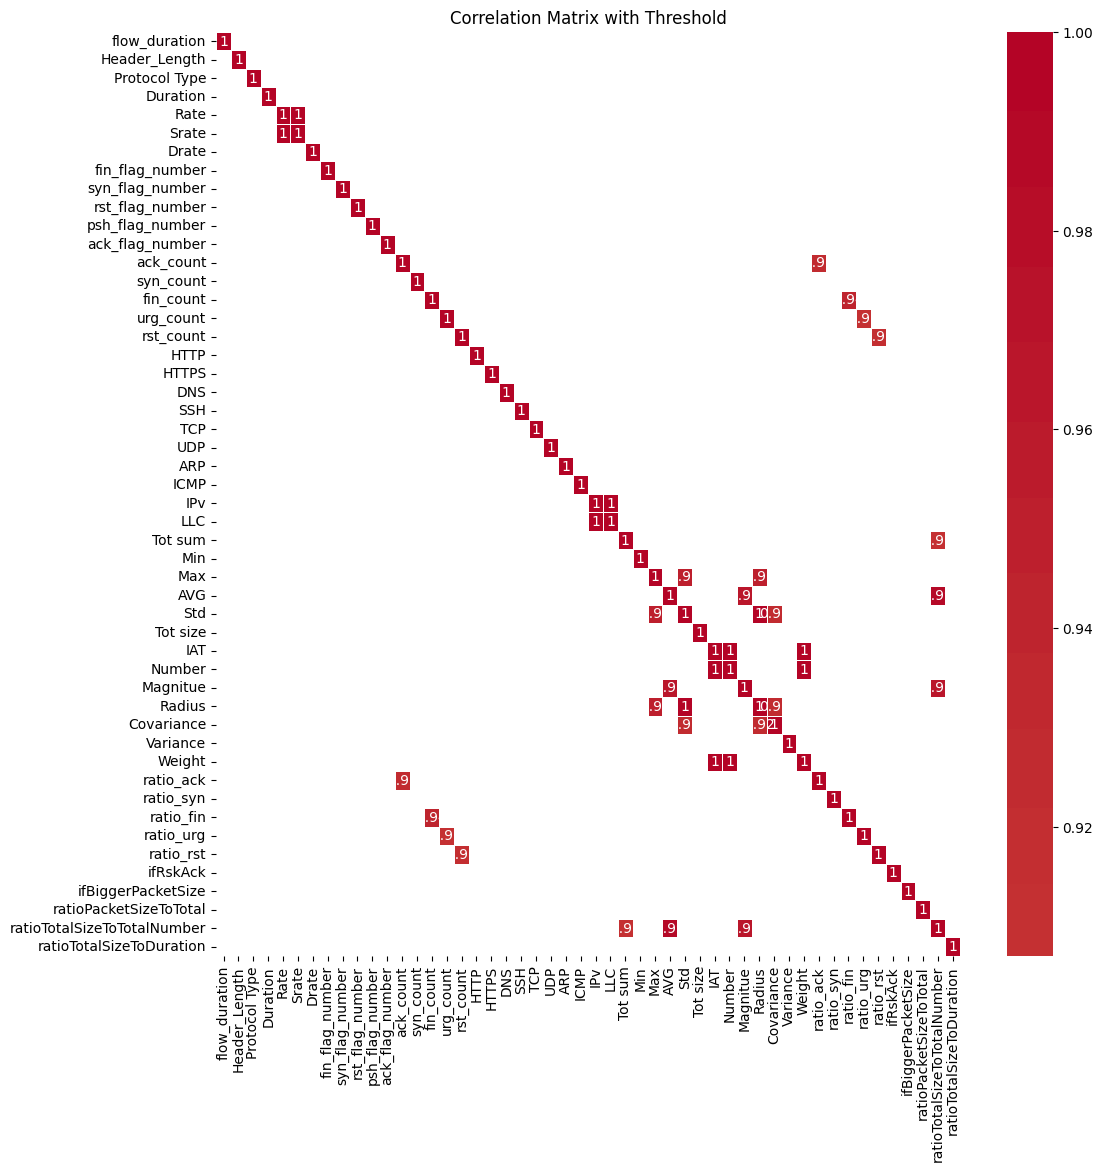

In [ ]:
# Define a threshold
threshold = 0.9
corr_matrix = df_noTarget.corr()

# Create a mask for values below the threshold
mask = np.abs(corr_matrix) < threshold
# Apply the mask to the correlation matrix
filtered_corr = corr_matrix.mask(mask)

# Create a heatmap with the masked correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(filtered_corr, cmap='coolwarm', center=0, annot=True, linewidths=.5)
plt.title('Correlation Matrix with Threshold')
plt.show()

In [ ]:
correlation_flat = corr_matrix.abs().unstack().sort_values(ascending=False)
correlation_flat = correlation_flat[correlation_flat.index.get_level_values(0) != correlation_flat.index.get_level_values(1)]
correlation_flat = correlation_flat[correlation_flat > threshold]
correlation_flat

Srate                        Rate                           1.000000
Rate                         Srate                          1.000000
IPv                          LLC                            1.000000
LLC                          IPv                            1.000000
Std                          Radius                         0.999965
Radius                       Std                            0.999965
Number                       Weight                         0.999912
Weight                       Number                         0.999912
                             IAT                            0.999634
IAT                          Weight                         0.999634
Number                       IAT                            0.999269
IAT                          Number                         0.999269
ratioTotalSizeToTotalNumber  AVG                            0.991582
AVG                          ratioTotalSizeToTotalNumber    0.991582
Magnitue                     AVG  

In [ ]:
import numpy as np

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
to_drop


['Srate',
 'LLC',
 'Std',
 'Number',
 'Magnitue',
 'Radius',
 'Covariance',
 'Weight',
 'ratio_ack',
 'ratio_fin',
 'ratio_urg',
 'ratio_rst',
 'ratioTotalSizeToTotalNumber']

In [ ]:
# # Drop correlated features 
df.drop(to_drop, axis=1, inplace=True)

### Feature importance

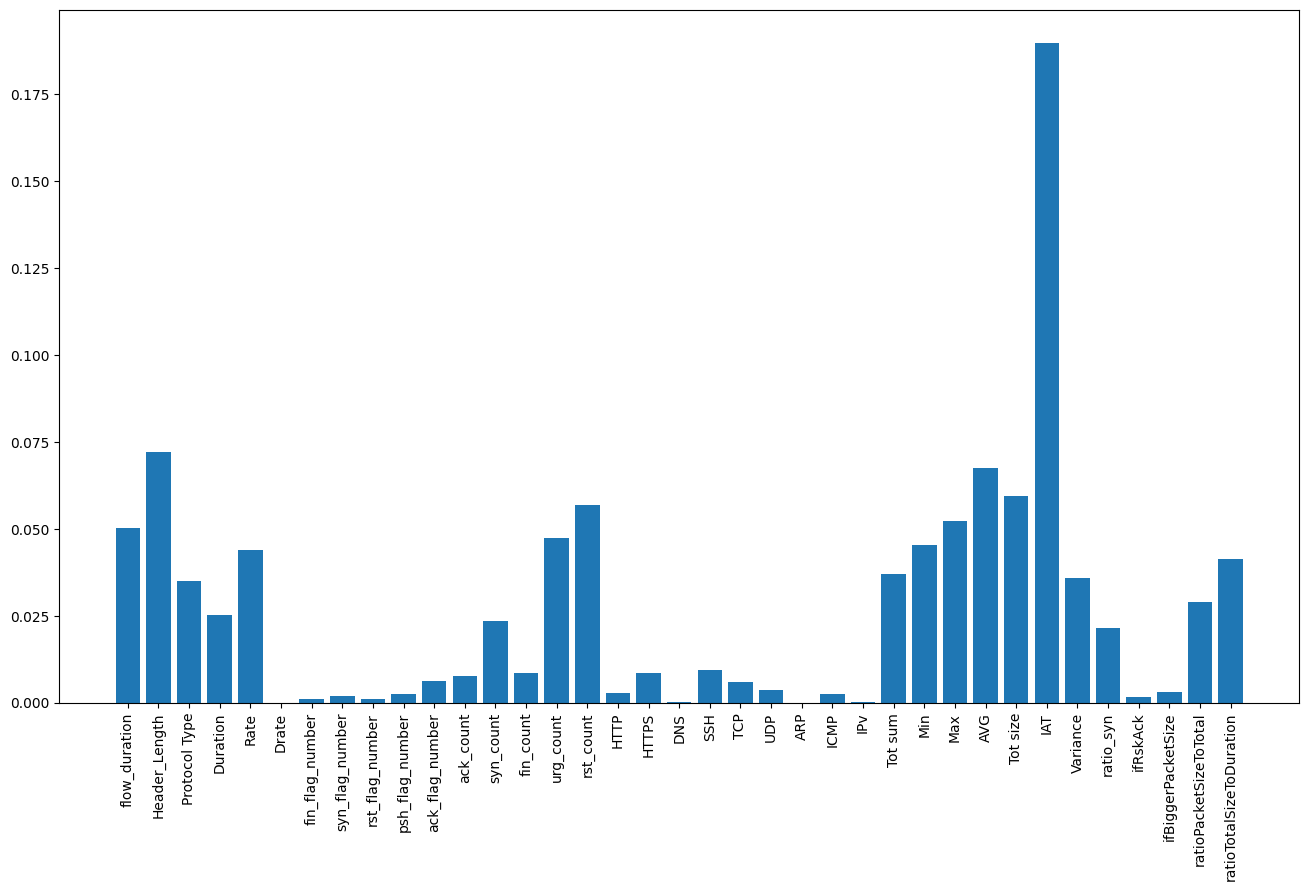

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

numeric_columns = df.select_dtypes(include='number').columns
X = df[numeric_columns]
y = df.family

model = RandomForestClassifier(n_estimators = 300)
model.fit(X, y)
importance = model.feature_importances_
plt.figure(figsize=(16, 9))
pyplot.bar(numeric_columns, importance)
pyplot.xticks(rotation = 90)
pyplot.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 300))
sel.fit(X, y)
selected_feat = X.columns[(sel.get_support())]
len(selected_feat)

15

In [ ]:
print(selected_feat)

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Rate', 'urg_count',
       'rst_count', 'Tot sum', 'Min', 'Max', 'AVG', 'Tot size', 'IAT',
       'Variance', 'ratioPacketSizeToTotal', 'ratioTotalSizeToDuration'],
      dtype='object')


In [ ]:
X = X[selected_feat]
X["family"] = df.family
df = X

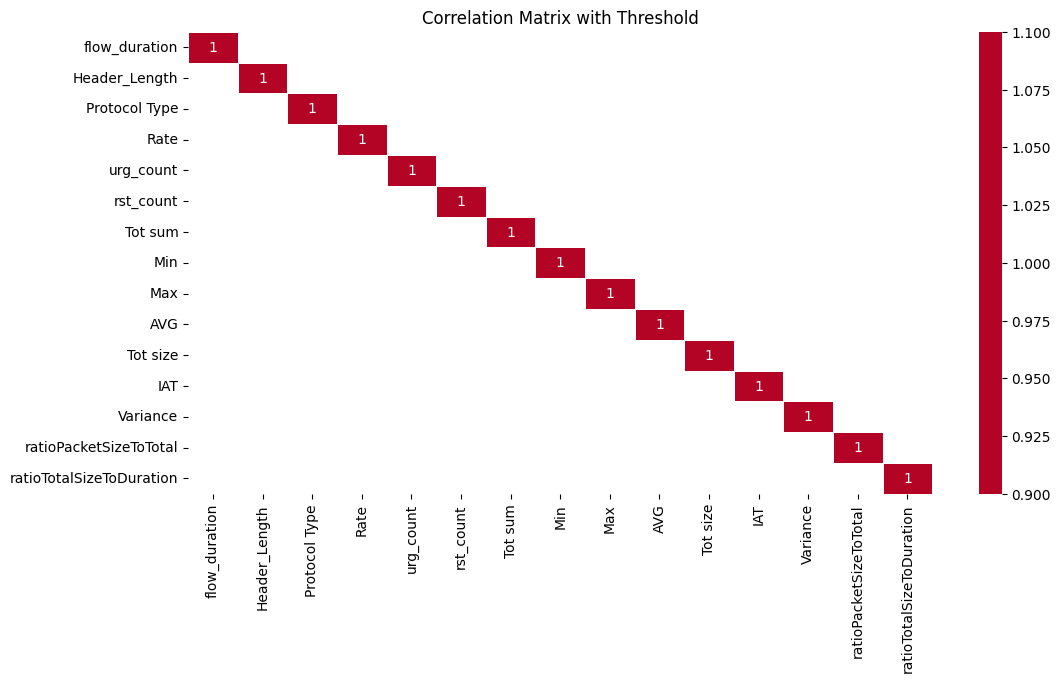

In [ ]:
corr_matrix = X.corr().abs()
mask = np.abs(corr_matrix) < threshold

filtered_corr = corr_matrix.mask(mask)

plt.figure(figsize=(12, 6))
sns.heatmap(filtered_corr, cmap='coolwarm', center=0, annot=True, linewidths=.5)
plt.title('Correlation Matrix with Threshold')
plt.show()

### Feature transformation

In [ ]:
df.head()

,flow_duration,Header_Length,Protocol Type,Rate,urg_count,rst_count,Tot sum,Min,Max,AVG,Tot size,IAT,Variance,ratioPacketSizeToTotal,ratioTotalSizeToDuration,family,label
0,3.929349,531816.3,5,118.458798,13.5,465.3,9338.8,933.0,2962.0,1675.261825,1947.8,5.895138e-04,0.7,0.208571,2376.672406,Benign,BenignTraffic
1,14.069667,1167126.3,6,79.397178,52.5,1143.7,8886.3,66.0,2675.5,1305.146627,2144.8,1.819396e-03,0.9,0.241360,631.592308,Benign,BenignTraffic
2,18.121312,183269.9,6,116.289429,107.8,327.1,18018.6,66.0,2962.0,1161.613768,1233.4,1.665181e+08,1.0,0.068451,994.331434,Benign,BenignTraffic
3,22.203657,60049.8,6,26.472761,148.8,320.5,524.1,75.0,197.7,99.873452,130.8,6.905985e-03,0.9,0.249571,23.604210,Benign,BenignTraffic
4,31.992701,1979773.4,6,64.141615,107.3,1886.4,11844.5,66.0,4136.8,703.415408,2005.9,1.665207e+08,1.0,0.169353,370.224954,Benign,BenignTraffic


In [ ]:
binary_columns = ['ifBiggerPacketSize','DNS', 'Telnet', 'SMTP', 'HTTP', 'HTTPS', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=binary_columns,errors='ignore')  # errors='ignore' allows for columns that don't exist to be skipped without raising an error


In [ ]:
numeric_df.head()

,flow_duration,Header_Length,Protocol Type,Rate,urg_count,rst_count,Tot sum,Min,Max,AVG,Tot size,IAT,Variance,ratioPacketSizeToTotal,ratioTotalSizeToDuration
0,3.929349,531816.3,5,118.458798,13.5,465.3,9338.8,933.0,2962.0,1675.261825,1947.8,5.895138e-04,0.7,0.208571,2376.672406
1,14.069667,1167126.3,6,79.397178,52.5,1143.7,8886.3,66.0,2675.5,1305.146627,2144.8,1.819396e-03,0.9,0.241360,631.592308
2,18.121312,183269.9,6,116.289429,107.8,327.1,18018.6,66.0,2962.0,1161.613768,1233.4,1.665181e+08,1.0,0.068451,994.331434
3,22.203657,60049.8,6,26.472761,148.8,320.5,524.1,75.0,197.7,99.873452,130.8,6.905985e-03,0.9,0.249571,23.604210
4,31.992701,1979773.4,6,64.141615,107.3,1886.4,11844.5,66.0,4136.8,703.415408,2005.9,1.665207e+08,1.0,0.169353,370.224954


In [ ]:
numeric_columns=[col for col in df.select_dtypes(include=np.number).columns.tolist() if col not in binary_columns]
df[numeric_columns]

,flow_duration,Header_Length,Protocol Type,Rate,urg_count,rst_count,Tot sum,Min,Max,AVG,Tot size,IAT,Variance,ratioPacketSizeToTotal,ratioTotalSizeToDuration
0,3.929349,531816.3,5,118.458798,13.5,465.3,9338.8,933.0,2962.0,1675.261825,1947.8,5.895138e-04,0.7,0.208571,2376.672406
1,14.069667,1167126.3,6,79.397178,52.5,1143.7,8886.3,66.0,2675.5,1305.146627,2144.8,1.819396e-03,0.9,0.241360,631.592308
2,18.121312,183269.9,6,116.289429,107.8,327.1,18018.6,66.0,2962.0,1161.613768,1233.4,1.665181e+08,1.0,0.068451,994.331434
3,22.203657,60049.8,6,26.472761,148.8,320.5,524.1,75.0,197.7,99.873452,130.8,6.905985e-03,0.9,0.249571,23.604210
4,31.992701,1979773.4,6,64.141615,107.3,1886.4,11844.5,66.0,4136.8,703.415408,2005.9,1.665207e+08,1.0,0.169353,370.224954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840,26.041635,254624.0,6,9.811210,33.9,255.5,8217.0,1494.0,1494.0,1494.000000,1494.0,1.389027e-04,0.0,0.181818,315.533059
6841,24.221325,979.2,10,169.476555,1.6,3.7,2007.2,50.0,441.0,131.316513,124.9,1.664818e+08,1.0,0.062226,82.869091
6842,16.764280,41929.6,6,2.713928,10.0,45.5,12637.6,60.0,3179.0,785.627979,1796.9,1.668459e+08,1.0,0.142187,753.840475
6843,11.705476,606405.4,6,38.400827,190.6,449.5,2439.4,78.0,939.6,336.821905,652.4,6.809235e-05,0.6,0.267443,208.398010


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(numeric_df.to_numpy())
df.head()

,flow_duration,Header_Length,Protocol Type,Rate,urg_count,rst_count,Tot sum,Min,Max,AVG,Tot size,IAT,Variance,ratioPacketSizeToTotal,ratioTotalSizeToDuration,family,label
0,-0.245675,0.036409,-0.581913,-0.146124,-0.246885,0.096990,0.896914,2.556650,1.947607,2.545784,3.007555,-1.229292,0.279803,1.331092,-0.290519,Benign,BenignTraffic
1,-0.217959,0.558770,-0.485974,-0.152286,-0.087476,0.806597,0.822180,-0.377260,1.692497,1.824066,3.383785,-1.229292,0.739672,1.823924,-0.290531,Benign,BenignTraffic
2,-0.206885,-0.250171,-0.485974,-0.146467,0.138559,-0.047567,2.330451,-0.377260,1.947607,1.544180,1.643194,1.254592,0.969606,-0.774921,-0.290529,Benign,BenignTraffic
3,-0.195727,-0.351484,-0.485974,-0.160635,0.306143,-0.054471,-0.558902,-0.346805,-0.513828,-0.526194,-0.462549,-1.229292,0.739672,1.947328,-0.290536,Benign,BenignTraffic
4,-0.168971,1.226941,-0.485974,-0.154693,0.136515,1.583461,1.310750,-0.377260,2.993693,0.650702,3.118514,1.254630,0.969606,0.741642,-0.290533,Benign,BenignTraffic


In [ ]:
df.to_csv("preprocessed.csv", encoding='utf-8', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a3c41eb-c99a-4899-842d-6de17d10af25' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>